<a href="https://colab.research.google.com/github/KaushikDasarii/kaushik/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df=pd.read_csv('/content/StudentsPerformance[1].csv')
df=df.iloc[:, 6:9]
df=df.head(20)
df

,reading score,writing score
0,72,74
1,90,88
2,95,93
3,57,44
4,78,75
5,83,78
6,95,92
7,43,39
8,64,67
9,60,50


In [ ]:
df

,reading score,writing score
0,72,74
1,90,88
2,95,93
3,57,44
4,78,75
5,83,78
6,95,92
7,43,39
8,64,67
9,60,50


Text(0, 0.5, 'reading score')

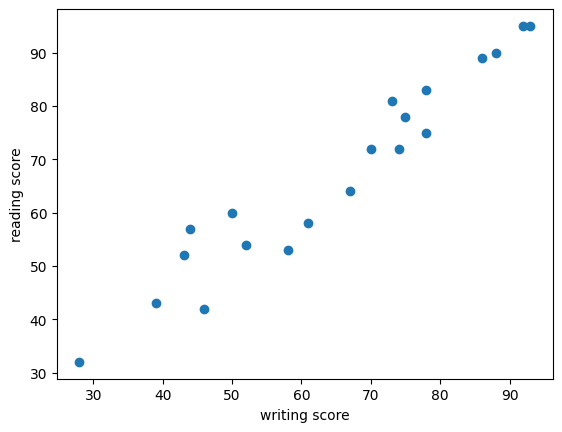

In [ ]:
## SCATTER PLOT

plt.scatter(df['writing score'], df['reading score'])
plt.xlabel('writing score')
plt.ylabel('reading score')

In [ ]:
df.corr()

,reading score,writing score
reading score,1.000000,0.965963
writing score,0.965963,1.000000


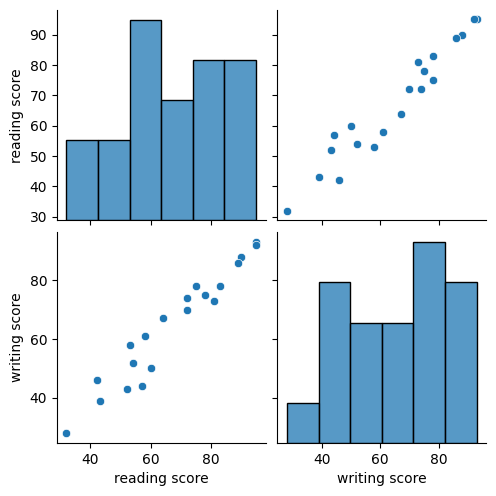

In [ ]:
import seaborn as sns

sns.pairplot(df)

In [ ]:
## Independent and dependent features
## Independent feature should be 2d array or data frame
X=df[['reading score']]
y=df['writing score'] ### series or 1d array form





In [ ]:
## Train Testing

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [ ]:
X_train.shape

(15, 1)

In [ ]:
## Standardaization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
## TO AVIOD DATA LEAKAGE
X_test=scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [ ]:
## APPLY LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([0.96642196])

In [ ]:
regressor.intercept_

np.float64(-1.201268281535647)

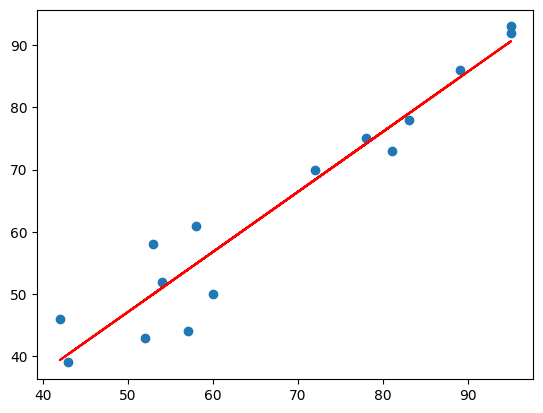

In [ ]:
## plot best fit line acc to trained data

plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),color='red')

In [ ]:
# prediction for test data

y_pred=regressor.predict(X_test)

In [ ]:
# Performance metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

4.5272594835466275
24.993410083775483
4.999340964944828


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9413850607791382

In [ ]:
# Display adjusted r score

1-(1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9218467477055176

In [ ]:
# OLS Method

import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
regressor_ols=sm.OLS(y_train,X_train_sm).fit()
regressor_ols.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          writing score   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     158.1
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           1.19e-08
Time:                        06:50:36   Log-Likelihood:                -45.088
No. Observations:                  15   AIC:                             94.18
Df Residuals:                      13   BIC:                             95.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.2013      5.360     -0.224      0.826     -12.780      10.378
reading score     0.9664      0.077     12.574      0.000       0.800       1.132
==============================================================================
Omnibus:                        0.362   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.428
Skew:                          -0.295   Prob(JB):                        0.807
Kurtosis:                       2.420   Cond. No.                         276.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## predict

regressor.predict([[72]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([68.38111289])

In [ ]:

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)